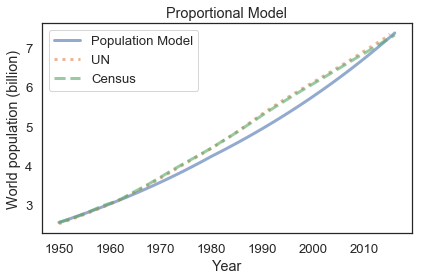

In [63]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
from pandas import read_html

#--------------------------------------------
# Importing data and organizing it

filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')

table2 = tables[2]
table2.columns = table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

un = table2 .un / 1e9
census = table2.census / 1e9

#---------------------------------------------
# Assigning parameters in the system object

t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)
p_end = get_last_value(census)
time_elapsed = t_end - t_0
total_growth = p_end - p_0
annual_growth = total_growth / time_elapsed

system = System(t_0 = t_0, t_end = t_end, p_0 = p_0, p_end = p_end, time_elapsed = time_elapsed, annual_grwoth = annual_growth)

#---------------------------------------------
# This is the run simulation function that executes the linear growth model 

def run_simulation_linear(system):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
            results[t+1] = results[t] + system.annual_grwoth 
    
    return results

#---------------------------------------------
# This is the function that would stand in place of the linear growth function...

system.death_rate = 0.01
system.birth_rate = 0.027

def run_simulation_proportional(system):
    results = TimeSeries()
    results[system.t_0] = system.p_0

    for t in linrange(system.t_0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths

    return results

def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

#---------------------------------------------
# ...but we're gonna make things harder (even though it's a good skill to have) and update the original function

def update_func1(pop, t, system):
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths

#---------------------------------------------
# So now we're gonna put that update function in as a parameter to a master function

def run_simulation_master(system, update_func):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    return results

#---------------------------------------------
# Moment of truth!
'''
title = 'Proportional Model'
results = run_simulation_master(system, update_func2)
plot(results, label = "Population Model")
plot(un, ':', label = "UN")
plot(census, '--', label = "Census")

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title=title)
'''
# Yay!!

#---------------------------------------------
# Time to do the exercises

t_1980 = 1980
system.birth_rate_after_1980 = 0.029
system.death_rate_after_1980 = 0.0135

def update_func2(pop, t, system):
    # Growth rate before 1980 is going to be left the same because that is when the model fit the data the best
    if t in range(t_0, t_1980):
        births = system.birth_rate * pop
        deaths = system.death_rate * pop
        return pop + births - deaths
    if t in range(t_1980, t_end):
        births = system.birth_rate_after_1980 * pop
        deaths = system.death_rate_after_1980 * pop
        return pop + births - deaths
    
# Running with the new update function:


title = 'Proportional Model'
results = run_simulation_master(system, update_func2)
plot(results, label = "Population Model")
plot(un, ':', label = "UN")
plot(census, '--', label = "Census")

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title=title)






4.451362735